# Projeto 2VA - Prova da disciplina de IA

#### Aluno: Victor Gabriel Tenório Oliveira

---

#### A prova é formada por 3 mini projetos práticos: </br>
1 - Treinar vários modelos no dataset IRIS </br>
2 - Treinar e plotar reta do perceptron </br> 
3.1 - Treinar DBSCAN e KMEANS (algoritmos de cluster não supervisionado) </br>
3.2 - Calcular tendência de agrupamento de Hopkins  </br>

---
Site para encontrar a base de dados:
https://archive.ics.uci.edu/ml/index.php

Documentação do Scikit Learn: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning


### Ctrl + F9 para executar tudo

---

## Questão 1)

### Código Reutilizável (Questão 1)

In [ ]:
# from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score

import numpy as np
import pandas as pd
from math import nan

def stratify_train_test_validation_split(X, y, random_state):

  # A base de dados deve ser dividida em 50% para treinamento,
  # 25% para validação e 25% para teste

  # Porcentagens para 2 split:
  treinamento_split = 0.75  # Resulta em 50%
  validacao_split   = 1/3   # Resulta em 25%
  teste_split       = 0.25  # Resulta em 25%

  # A separação dos dados deve ser estratificada

  # Divide em X_train (amostras de treino), X_test (amostras de teste)
  # y_train (classes de treino), y_test (classes de teste)
  X_train, X_test, y_train, y_test = train_test_split(
      X, y,
      stratify = y, # Garante a estratificação das classes
      train_size = treinamento_split,
      test_size  = teste_split,
      random_state = random_state, # Garante embaralhamento
      shuffle = True,
  )

  # Divide em X_train (amostras de treino), X_val (amostras de validação)
  # y_train (classes de treino), y_val (classes de validação)
  X_train, X_val, y_train, y_val = train_test_split(
      X_train, y_train,
      stratify = y_train, # Garante a estratificação das classes
      train_size = 2/3,
      test_size = validacao_split,
      random_state = random_state, # Garante embaralhamento
      shuffle = True,
  )

  return X_train, X_test, X_val, y_train, y_test, y_val



def five_shuffle_validation(models, best_key, X, y, model_name, dataset_name):

  print("=--------=")
  print(f"Embaralhamentos - {model_name} - {dataset_name}")
  print(f"Melhor modelo -> {models[best_key]}", end="\n\n")

  for i in range(5):
    embaralhamento = i*5
    (
      X_train, X_test, X_val,
      y_train, y_test, y_val
    ) = stratify_train_test_validation_split(X, y, embaralhamento)

    # Observa a acurácia do melhor modelo treinado
    print(f"Embaralhamento {i} - Accuracy (Precisão / Acurácia)")
    y_pred = models[best_key].predict(X_val)
    print(f"{ best_key } -> { sum(y_val == y_pred)*100 / y_val.shape[0]} \n")



def recall(models, best_key, dataset, X, y, dataset_name, target_name):

  print("=--------=")
  print(f"Recall do {models[best_key]}", end="\n\n")

  y_true = y
  y_pred = models[best_key].predict(X)

  # "average=None" garante que o recall de cada classe esteja separado no output
  recall_array = recall_score(y_true, y_pred, average = None)

  # Print do recall de cada classe única da coluna target
  classes = dataset[target_name].unique()
  for class_value, recall_value in zip(classes, recall_array):
    print(f"A classe {class_value} tem um recall de {recall_value:.2f}")
  print("\n")


### Tratamento das bases de dados

#### Iris Dataset

Link UCI: http://archive.ics.uci.edu/ml/datasets/Iris

In [ ]:
# Download do dataset
iris_dataset = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
)


# Renomeia as colunas
rename_map = {
    '5.1': 'SepalLengthCm',
    '3.5': 'SepalWidthCm',
    '1.4': 'PetalLengthCm',
    '0.2': 'PetalWidthCm',
    'Iris-setosa': 'species' # (target)
}
iris_dataset.rename(columns = rename_map, inplace=True, errors='raise')


# Replace '-' por '_' na coluna target do banco de dados
iris_dataset['species'] = iris_dataset['species'].apply(lambda v: v.replace('-', '_'))


# Visualiza base de dados
# print(iris_dataset)

# Divide em X (amostras) e y (classes)
iris_X = iris_dataset[
  ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
]
iris_y = iris_dataset['species']

# Visualiza recorte da base de dados
# print(X)
# print(y)


# Utiliza a função stratify_train_test_validation_split()
# definida no topo da seção Tratamento das bases de dados
(
  iris_X_train, iris_X_test, iris_X_val,
  iris_y_train, iris_y_test, iris_y_val
) = stratify_train_test_validation_split(iris_X, iris_y, 58)

# Visualiza as fatias para treino, teste e validação
# print(iris_X_train)
# print(iris_X_test)
# print(iris_X_val)
# print("------------")
# print(iris_y_train)
# print(iris_y_test)
# print(iris_y_val)

iris_dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,species
0,4.9,3.0,1.4,0.2,Iris_setosa
1,4.7,3.2,1.3,0.2,Iris_setosa
2,4.6,3.1,1.5,0.2,Iris_setosa
3,5.0,3.6,1.4,0.2,Iris_setosa
4,5.4,3.9,1.7,0.4,Iris_setosa


#### Soybean Dataset
Link UCI: https://archive.ics.uci.edu/ml/datasets/Soybean+(Large)

In [ ]:
# Download do dataset
soybean_dataset = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/soybean/soybean-large.data'
)


# Renomeia as colunas
columns_names = [
                 'Classes', # 0 (target)
                 'date',
                 'plant_stand',
                 'precip',
                 'temp',
                 'hail', # 5
                 'crop_hist',
                 'area_damaged',
                 'severity',
                 'seed_tmt',
                 'germination', # 10
                 'plant_growth',
                 'leaves',
                 'leafspots_halo',
                 'leafspots_marg',
                 'leafspot_size', # 15
                 'leaf_shread',
                 'leaf_malf',
                 'leaf_mild',
                 'stem',
                 'lodging', # 20
                 'stem_cankers',
                 'canker_lesion',
                 'fruiting_bodies',
                 'external_decay',
                 'mycelium', # 25
                 'int_discolor',
                 'sclerotia',
                 'fruit_pods',
                 'fruit_spots',
                 'seed', # 30
                 'mold_growth',
                 'seed_discolor',
                 'seed_size',
                 'shriveling',
                 'roots' # 35
                 ]
columns_number = soybean_dataset.shape[1]
soybean_dataset.columns = columns_names + soybean_dataset.columns[columns_number:].tolist()


# Dropando linhas que possuem valores '?' (desconhecidos / unknown)
for column_name in soybean_dataset:
    # print(f"Column Name -> {column_name}")
    soybean_dataset = soybean_dataset.query(f'{column_name} != "?"')
    # break


# Divide em X (amostras) e y (classes)
soybean_X = soybean_dataset.drop(['Classes'], axis = 1)
soybean_y = soybean_dataset['Classes']

# Visualiza recorte da base de dados
# print(X)
# print(y)


# Utiliza a função stratify_train_test_validation_split()
# definida no topo da seção Tratamento das bases de dados
(
  soybean_X_train, soybean_X_test, soybean_X_val,
  soybean_y_train, soybean_y_test, soybean_y_val
) = stratify_train_test_validation_split(soybean_X, soybean_y, 47)

# Visualiza as fatias para treino, teste e validação
# print(soybean_X_train)
# print(soybean_X_test)
# print(soybean_X_val)
# print("------------")
# print(soybean_y_train)
# print(soybean_y_test)
# print(soybean_y_val)

soybean_dataset.head()

,Classes,date,plant_stand,precip,temp,hail,crop_hist,area_damaged,severity,seed_tmt,...,int_discolor,sclerotia,fruit_pods,fruit_spots,seed,mold_growth,seed_discolor,seed_size,shriveling,roots
0,diaporthe-stem-canker,4,0,2,1,0,2,0,2,1,...,0,0,0,4,0,0,0,0,0,0
1,diaporthe-stem-canker,3,0,2,1,0,1,0,2,1,...,0,0,0,4,0,0,0,0,0,0
2,diaporthe-stem-canker,3,0,2,1,0,1,0,2,0,...,0,0,0,4,0,0,0,0,0,0
3,diaporthe-stem-canker,6,0,2,1,0,2,0,1,0,...,0,0,0,4,0,0,0,0,0,0
4,diaporthe-stem-canker,5,0,2,1,0,3,0,1,0,...,0,0,0,4,0,0,0,0,0,0


#### Breast Cancer Dataset

Link UCI: https://archive.ics.uci.edu/ml/datasets/breast+cancer

In [ ]:
# Download do dataset
breast_cancer_dataset = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer/breast-cancer.data'
)


# Renomeia as colunas
columns_names = [
                 'Class', # 0 (target)
                 'age',
                 'menopause',
                 'tumor_size',
                 'inv_nodes', # 5
                 'node_caps',
                 'deg_malig',
                 'breast',
                 'breast_quad',
                 'irradiat', # 10
                ]
columns_number = breast_cancer_dataset.shape[1]
breast_cancer_dataset.columns = columns_names + breast_cancer_dataset.columns[columns_number:].tolist()


# Dropando linhas que possuem valores '?' (desconhecidos / unknown)
for column_name in breast_cancer_dataset:
    # print(f"Column Name -> {column_name}")
    breast_cancer_dataset = breast_cancer_dataset.query(f'{column_name} != "?"')


# Transformando as colunas (features) string em int
mid_value = lambda v: (int(v.split('-')[0]) + int(v.split('-')[1])) / 2
breast_cancer_dataset['age'] = breast_cancer_dataset['age'].apply(mid_value)
breast_cancer_dataset['tumor_size'] = breast_cancer_dataset['tumor_size'].apply(mid_value)
breast_cancer_dataset['inv_nodes'] = breast_cancer_dataset['inv_nodes'].apply(mid_value)

lt40_40_gt40 = lambda v: 0 if v == "lt40" else (1 if v == "premeno" else 2)
breast_cancer_dataset['menopause'] = breast_cancer_dataset['menopause'].apply(lt40_40_gt40)

yes_no = lambda v: 0 if v == "no" else 1
breast_cancer_dataset['node_caps'] = breast_cancer_dataset['node_caps'].apply(yes_no)
breast_cancer_dataset['irradiat'] = breast_cancer_dataset['irradiat'].apply(yes_no)

left_right = lambda v: 0 if v == "left" else 1
breast_cancer_dataset['breast'] = breast_cancer_dataset['breast'].apply(left_right)

def lu_ll_ru_rl_c(v):
  if   v == "left_up":   return 0
  elif v == "left_low":  return 1
  elif v == "right_up":  return 2
  elif v == "right_low": return 3
  elif v == "central":   return 4
  else:
    print(f"v -> {v}")
    return np.nan
breast_cancer_dataset['breast_quad'] = breast_cancer_dataset['breast_quad'].apply(lu_ll_ru_rl_c)


# Divide em X (amostras) e y (classes)
cancer_X = breast_cancer_dataset.drop(['Class'], axis = 1)
cancer_y = breast_cancer_dataset['Class']

# Visualiza recorte da base de dados
# print(X)
# print(y)


# Utiliza a função stratify_train_test_validation_split()
# definida no topo da seção Tratamento das bases de dados
(
  cancer_X_train, cancer_X_test, cancer_X_val,
  cancer_y_train, cancer_y_test, cancer_y_val
) = stratify_train_test_validation_split(cancer_X, cancer_y, 47)

# Visualiza as fatias para treino, teste e validação
# print(cancer_X_train)
# print(cancer_X_test)
# print(cancer_X_val)
# print("------------")
# print(cancer_y_train)
# print(cancer_y_test)
# print(cancer_y_val)

breast_cancer_dataset.head()

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,44.5,1,22.0,1.0,0,2,1,2,0
1,no-recurrence-events,44.5,1,22.0,1.0,0,2,0,1,0
2,no-recurrence-events,64.5,2,17.0,1.0,0,2,1,0,0
3,no-recurrence-events,44.5,1,2.0,1.0,0,2,1,3,0
4,no-recurrence-events,64.5,2,17.0,1.0,0,2,0,1,0


#### Heart Disease Dataset

Link UCI: https://archive.ics.uci.edu/ml/datasets/heart+disease

In [ ]:
# Download do dataset
heart_disease_dataset = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
)


# Renomeia as colunas
columns_names = [
                 'age', # 0
                 'sex',
                 'cp',
                 'trestbps',
                 'chol',
                 'fbs', # 5
                 'restecg',
                 'thalach',
                 'exang',
                 'oldpeak',
                 'slope', # 10
                 'ca',
                 'thal',
                 'num', # 13 (target)
                ]
columns_number = heart_disease_dataset.shape[1]
heart_disease_dataset.columns = columns_names + heart_disease_dataset.columns[columns_number:].tolist()


# Dropando linhas que possuem valores '?' (desconhecidos / unknown)
for column_name in heart_disease_dataset:
    # print(f"Column Name -> {column_name}")
    heart_disease_dataset = heart_disease_dataset.query(f'{column_name} != "?"')


# Divide em X (amostras) e y (classes)
heart_X = heart_disease_dataset.drop(['num'], axis = 1)
heart_y = heart_disease_dataset['num']

# Visualiza recorte da base de dados
# print(X)
# print(y)


# Utiliza a função stratify_train_test_validation_split()
# definida no topo da seção Tratamento das bases de dados
(
  heart_X_train, heart_X_test, heart_X_val,
  heart_y_train, heart_y_test, heart_y_val
) = stratify_train_test_validation_split(heart_X, heart_y, 47)

# Visualiza as fatias para treino, teste e validação
# print(heart_X_train)
# print(heart_X_test)
# print(heart_X_val)
# print("------------")
# print(heart_y_train)
# print(heart_y_test)
# print(heart_y_val)

heart_disease_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


#### Car Evaluation Dataset

Link UCI: https://archive.ics.uci.edu/ml/datasets/car+evaluation

In [ ]:
# Download do dataset
car_eval_dataset = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data'
)

# Renomeia as colunas
columns_names = [
                 'buying', # 0
                 'maint',
                 'doors',
                 'persons',
                 'lug_boot',
                 'safety', # 5
                 'car_acceptability', # (target)
                ]
columns_number = car_eval_dataset.shape[1]
car_eval_dataset.columns = columns_names + car_eval_dataset.columns[columns_number:].tolist()


# Transformando as colunas (features) string em int
num_doors = lambda v: 5 if v == "5more" else v
car_eval_dataset['doors'] = car_eval_dataset['doors'].apply(num_doors)

persons = lambda v: 5 if v == "more" else v
car_eval_dataset['persons'] = car_eval_dataset['persons'].apply(persons)

def vhigh_hight_med_low(v):
  if   v == "vhigh":              return 3
  elif v == "high" or v == "big":  return 2
  elif v == "med":                 return 1
  elif v == "low" or v == "small": return 0
  else:
    print(f"v -> {v}")
    return np.nan
car_eval_dataset['buying'] = car_eval_dataset['buying'].apply(vhigh_hight_med_low)
car_eval_dataset['maint'] = car_eval_dataset['maint'].apply(vhigh_hight_med_low)
car_eval_dataset['lug_boot'] = car_eval_dataset['lug_boot'].apply(vhigh_hight_med_low)
car_eval_dataset['safety'] = car_eval_dataset['safety'].apply(vhigh_hight_med_low)


# Divide em X (amostras) e y (classes)
car_X = car_eval_dataset.drop(['car_acceptability'], axis = 1)
car_y = car_eval_dataset['car_acceptability']

# Visualiza recorte da base de dados
# print(X)
# print(y)


# Utiliza a função stratify_train_test_validation_split()
# definida no topo da seção Tratamento das bases de dados
(
  car_X_train, car_X_test, car_X_val,
  car_y_train, car_y_test, car_y_val
) = stratify_train_test_validation_split(car_X, car_y, 47)

# Visualiza as fatias para treino, teste e validação
# print(car_X_train)
# print(car_X_test)
# print(car_X_val)
# print("------------")
# print(car_y_train)
# print(car_y_test)
# print(car_y_val)

car_eval_dataset.head()

,buying,maint,doors,persons,lug_boot,safety,car_acceptability
0,3,3,2,2,0,1,unacc
1,3,3,2,2,0,2,unacc
2,3,3,2,2,1,0,unacc
3,3,3,2,2,1,1,unacc
4,3,3,2,2,1,2,unacc


---

### KNN


#### Define run_knn()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier



# Encontra e retorna o melhor classificador
def run_knn(X_train, X_test, X_val, y_train, y_test, y_val, dataset_name):
  # Gera o(s) classificador(es) knn com um k diferente para cada
  knns = {
      'knn_1':  KNeighborsClassifier(n_neighbors =  1),
      'knn_3':  KNeighborsClassifier(n_neighbors =  3),
      'knn_5':  KNeighborsClassifier(n_neighbors =  5),
      'knn_7':  KNeighborsClassifier(n_neighbors =  7),
      'knn_9':  KNeighborsClassifier(n_neighbors =  9),
      'knn_11': KNeighborsClassifier(n_neighbors = 11),
      'knn_13': KNeighborsClassifier(n_neighbors = 13),
      'knn_15': KNeighborsClassifier(n_neighbors = 15),
  }


  # Treina o(s) classificador(es) gerado(s)
  knns['knn_1' ].fit(X_train, y_train)
  knns['knn_3' ].fit(X_train, y_train)
  knns['knn_5' ].fit(X_train, y_train)
  knns['knn_7' ].fit(X_train, y_train)
  knns['knn_9' ].fit(X_train, y_train)
  knns['knn_11'].fit(X_train, y_train)
  knns['knn_13'].fit(X_train, y_train)
  knns['knn_15'].fit(X_train, y_train)

  # Observa a pontuação dos modelos treinados
  scores = {
            'knn_1':  knns['knn_1' ].score(X_test, y_test) * 100,
            'knn_3':  knns['knn_3' ].score(X_test, y_test) * 100,
            'knn_5':  knns['knn_5' ].score(X_test, y_test) * 100,
            'knn_7':  knns['knn_7' ].score(X_test, y_test) * 100,
            'knn_9':  knns['knn_9' ].score(X_test, y_test) * 100,
            'knn_11': knns['knn_11'].score(X_test, y_test) * 100,
            'knn_13': knns['knn_13'].score(X_test, y_test) * 100,
            'knn_15': knns['knn_15'].score(X_test, y_test) * 100,
  }


  print(f"Scores (Pontuações) - knn - {dataset_name}")
  print(f"k = 1  -> { scores['knn_1' ] } ")
  print(f"k = 3  -> { scores['knn_3' ] } ")
  print(f"k = 5  -> { scores['knn_5' ] } ")
  print(f"k = 7  -> { scores['knn_7' ] } ")
  print(f"k = 9  -> { scores['knn_9' ] } ")
  print(f"k = 11 -> { scores['knn_11'] } ")
  print(f"k = 13 -> { scores['knn_13'] } ")
  print(f"k = 15 -> { scores['knn_15'] } ", end="\n\n")

  max_key = max(scores, key=scores.get)
  max_score = max(scores)
  print(f"Melhor score: { max_key } -> { scores[max_key] }", end="\n\n")

  # Observa a acurácia do melhor modelo treinado
  print(f"Accuracy (Precisão / Acurácia) do melhor modelo treinado")
  y_pred = knns[max_key].predict(X_val)
  print(f"{ max_key } -> {sum(y_val == y_pred) / y_val.shape[0]} ", end="\n\n")

  return knns, max_key


#### Iris - KNN

In [ ]:
# Utiliza run_knn() definida no topo da seção KNN
knns, best_key = run_knn(iris_X_train, iris_X_test, iris_X_val,
                         iris_y_train, iris_y_test, iris_y_val,
                         "Iris Dataset"
                         )

# O melhor parâmetro deve ser aplicado a 5 diferentes embaralhamentos da bases de dados
five_shuffle_validation(knns, best_key,
                        iris_X, iris_y,
                        "knn",
                        "Iris Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(knns, best_key,
       iris_dataset,
       iris_X_val, iris_y_val,
       "Iris Dataset", "species"
       )

# print(iris_dataset)

Scores (Pontuações) - knn - Iris Dataset
k = 1  -> 92.10526315789474 
k = 3  -> 94.73684210526315 
k = 5  -> 97.36842105263158 
k = 7  -> 97.36842105263158 
k = 9  -> 97.36842105263158 
k = 11 -> 94.73684210526315 
k = 13 -> 97.36842105263158 
k = 15 -> 94.73684210526315 

Melhor score: knn_5 -> 97.36842105263158

Accuracy (Precisão / Acurácia) do melhor modelo treinado
knn_5 -> 0.8918918918918919 

=--------=
Embaralhamentos - knn - Iris Dataset
Melhor modelo -> KNeighborsClassifier()

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
knn_5 -> 97.29729729729729 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
knn_5 -> 94.5945945945946 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
knn_5 -> 94.5945945945946 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
knn_5 -> 100.0 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
knn_5 -> 97.29729729729729 

=--------=
Recall do KNeighborsClassifier()

A classe Iris_setosa tem um recall de 1.00
A classe Iris_versicolor tem um recall 

#### Soybean - KNN

In [ ]:
# Utiliza run_knn() definida no topo da seção KNN
knns, best_key = run_knn(soybean_X_train, soybean_X_test, soybean_X_val,
                         soybean_y_train, soybean_y_test, soybean_y_val,
                         "Soybean Dataset"
                         )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(knns, best_key,
                        soybean_X, soybean_y,
                        "knn",
                        "Soybean Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(knns, best_key,
       soybean_dataset,
       soybean_X_val, soybean_y_val,
       "Soybean Dataset", "Classes"
       )


# print(soybean_dataset)

Scores (Pontuações) - knn - Soybean Dataset
k = 1  -> 82.08955223880598 
k = 3  -> 86.56716417910447 
k = 5  -> 70.1492537313433 
k = 7  -> 64.17910447761194 
k = 9  -> 70.1492537313433 
k = 11 -> 55.223880597014926 
k = 13 -> 50.74626865671642 
k = 15 -> 49.25373134328358 

Melhor score: knn_3 -> 86.56716417910447

Accuracy (Precisão / Acurácia) do melhor modelo treinado
knn_3 -> 0.7272727272727273 

=--------=
Embaralhamentos - knn - Soybean Dataset
Melhor modelo -> KNeighborsClassifier(n_neighbors=3)

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
knn_3 -> 80.3030303030303 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
knn_3 -> 87.87878787878788 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
knn_3 -> 84.84848484848484 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
knn_3 -> 86.36363636363636 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
knn_3 -> 86.36363636363636 

=--------=
Recall do KNeighborsClassifier(n_neighbors=3)

A classe diaporthe-stem-canker tem um 

#### Breast Cancer - KNN

In [ ]:
# Utiliza run_knn() definida no topo da seção KNN
knns, best_key = run_knn(cancer_X_train, cancer_X_test, cancer_X_val,
                         cancer_y_train, cancer_y_test, cancer_y_val,
                         "Breast Cancer Dataset"
                         )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(knns, best_key,
                        cancer_X, cancer_y,
                        "knn",
                        "Breast Cancer Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(knns, best_key,
       breast_cancer_dataset,
       cancer_X_val, cancer_y_val,
       "Breat Cancer Dataset", "Class"
       )

# print(breast_cancer_dataset)

Scores (Pontuações) - knn - Breast Cancer Dataset
k = 1  -> 63.76811594202898 
k = 3  -> 65.21739130434783 
k = 5  -> 72.46376811594203 
k = 7  -> 72.46376811594203 
k = 9  -> 71.01449275362319 
k = 11 -> 73.91304347826086 
k = 13 -> 71.01449275362319 
k = 15 -> 73.91304347826086 

Melhor score: knn_11 -> 73.91304347826086

Accuracy (Precisão / Acurácia) do melhor modelo treinado
knn_11 -> 0.7101449275362319 

=--------=
Embaralhamentos - knn - Breast Cancer Dataset
Melhor modelo -> KNeighborsClassifier(n_neighbors=11)

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
knn_11 -> 78.26086956521739 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
knn_11 -> 73.91304347826087 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
knn_11 -> 72.46376811594203 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
knn_11 -> 66.66666666666667 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
knn_11 -> 75.3623188405797 

=--------=
Recall do KNeighborsClassifier(n_neighbors=11)

A classe no-recu

#### Heart Disease - KNN

In [ ]:
# Utiliza run_knn() definida no topo da seção KNN
knns, best_key = run_knn(heart_X_train, heart_X_test, heart_X_val,
                         heart_y_train, heart_y_test, heart_y_val,
                         "Heart Disease Dataset"
                         )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(knns, best_key,
                        heart_X, heart_y,
                        "knn",
                        "Heart Disease Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(knns, best_key,
       heart_disease_dataset,
       heart_X_val, heart_y_val,
       "Heart Disease Dataset", "num"
       )

# print(heart_disease_dataset)

Scores (Pontuações) - knn - Heart Disease Dataset
k = 1  -> 40.54054054054054 
k = 3  -> 48.64864864864865 
k = 5  -> 55.4054054054054 
k = 7  -> 52.702702702702695 
k = 9  -> 54.054054054054056 
k = 11 -> 58.108108108108105 
k = 13 -> 54.054054054054056 
k = 15 -> 56.75675675675676 

Melhor score: knn_11 -> 58.108108108108105

Accuracy (Precisão / Acurácia) do melhor modelo treinado
knn_11 -> 0.5540540540540541 

=--------=
Embaralhamentos - knn - Heart Disease Dataset
Melhor modelo -> KNeighborsClassifier(n_neighbors=11)

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
knn_11 -> 58.108108108108105 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
knn_11 -> 54.054054054054056 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
knn_11 -> 55.4054054054054 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
knn_11 -> 56.75675675675676 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
knn_11 -> 58.108108108108105 

=--------=
Recall do KNeighborsClassifier(n_neighbors=11)

A classe 

#### Car Evaluation - KNN

In [ ]:
# Utiliza run_knn() definida no topo da seção KNN
knns, best_key = run_knn(car_X_train, car_X_test, car_X_val,
                         car_y_train, car_y_test, car_y_val,
                         "Car Evaluation Dataset"
                         )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(knns, best_key,
                        car_X, car_y,
                        "knn",
                        "Car Evaluation Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(knns, best_key,
       car_eval_dataset,
       car_X_val, car_y_val,
       "Car Evaluation Dataset", "car_acceptability"
       )

# print(car_eval_dataset)

Scores (Pontuações) - knn - Car Evaluation Dataset
k = 1  -> 85.64814814814815 
k = 3  -> 93.05555555555556 
k = 5  -> 93.75 
k = 7  -> 91.66666666666666 
k = 9  -> 91.89814814814815 
k = 11 -> 90.27777777777779 
k = 13 -> 91.66666666666666 
k = 15 -> 91.66666666666666 

Melhor score: knn_5 -> 93.75

Accuracy (Precisão / Acurácia) do melhor modelo treinado
knn_5 -> 0.9305555555555556 

=--------=
Embaralhamentos - knn - Car Evaluation Dataset
Melhor modelo -> KNeighborsClassifier()

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
knn_5 -> 94.67592592592592 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
knn_5 -> 96.29629629629629 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
knn_5 -> 95.83333333333333 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
knn_5 -> 95.60185185185185 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
knn_5 -> 95.83333333333333 

=--------=
Recall do KNeighborsClassifier()

A classe unacc tem um recall de 0.93
A classe acc tem um recall de 0.67


---

### Árvores de Decisão

#### Define run_tree()

In [ ]:
from sklearn import tree as t




def run_tree(X_train, X_test, X_val, y_train, y_test, y_val, dataset_name):
  # Gera os classificadores tree
  trees = {
      'tree_g_b': t.DecisionTreeClassifier(criterion="gini", splitter = "best"),
      'tree_e_b': t.DecisionTreeClassifier(criterion="entropy", splitter = "best"),

      'tree_g_r': t.DecisionTreeClassifier(criterion="gini", splitter = "random"),
      'tree_e_r': t.DecisionTreeClassifier(criterion="entropy", splitter = "random"),
  }


  # Treina os classificadores gerados
  trees['tree_g_b'].fit(X_train, y_train)
  trees['tree_e_b'].fit(X_train, y_train)

  trees['tree_g_r'].fit(X_train, y_train)
  trees['tree_e_r'].fit(X_train, y_train)

  # Observa a pontuação dos modelos treinados
  scores = {
            'tree_g_b': trees['tree_g_b'].score(X_test, y_test) * 100 ,
            'tree_e_b': trees['tree_e_b'].score(X_test, y_test) * 100,

            'tree_g_r': trees['tree_g_r'].score(X_test, y_test) * 100,
            'tree_e_r': trees['tree_e_r'].score(X_test, y_test) * 100,
  }

  print(f"Scores (Pontuações) - Árvores de Decisão - {dataset_name}")
  print(f"tree_g_b -> { scores['tree_g_b'] } ")
  print(f"tree_e_b -> { scores['tree_e_b'] } ")

  print(f"tree_g_r -> { scores['tree_g_r'] } ")
  print(f"tree_e_r -> { scores['tree_e_r'] } ", end="\n\n\n")

  max_key = max(scores, key=scores.get)
  max_score = max(scores)
  print(f"Melhor score: { max_key } -> { scores[max_key] }", end="\n\n")

  # Observa a acurácia do melhor modelo treinado
  print(f"Accuracy (Precisão / Acurácia) do melhor modelo treinado")
  y_pred = trees[max_key].predict(X_val)
  print(f"{ max_key } -> {sum(y_val == y_pred) / y_val.shape[0]} ", end="\n\n")

  return trees, max_key


#### Iris - Árvores de Decisão

Scores (Pontuações) - Árvores de Decisão - Iris Dataset
tree_g_b -> 94.73684210526315 
tree_e_b -> 92.10526315789474 
tree_g_r -> 94.73684210526315 
tree_e_r -> 86.8421052631579 


Melhor score: tree_g_b -> 94.73684210526315

Accuracy (Precisão / Acurácia) do melhor modelo treinado
tree_g_b -> 0.8918918918918919 

=--------=
Embaralhamentos - Árvores de Decisão - Iris Dataset
Melhor modelo -> DecisionTreeClassifier()

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
tree_g_b -> 97.29729729729729 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
tree_g_b -> 97.29729729729729 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
tree_g_b -> 94.5945945945946 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
tree_g_b -> 97.29729729729729 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
tree_g_b -> 94.5945945945946 

=--------=
Recall do DecisionTreeClassifier()

A classe Iris_setosa tem um recall de 1.00
A classe Iris_versicolor tem um recall de 0.75
A classe Iris_virginica tem um re

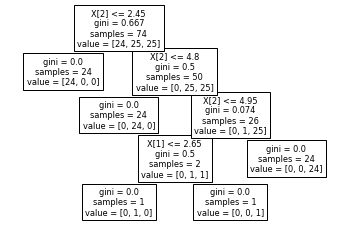

In [ ]:
# Utiliza run_tree() definida no topo da seção Árvores de Decisão
trees, best_key = run_tree(iris_X_train, iris_X_test, iris_X_val,
                           iris_y_train, iris_y_test, iris_y_val,
                           "Iris Dataset"
                           )

# Visualização gráfica da melhor árvore
t.plot_tree(trees[best_key])

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(trees, best_key,
                        iris_X, iris_y,
                        "Árvores de Decisão",
                        "Iris Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(trees, best_key,
       iris_dataset,
       iris_X_val, iris_y_val,
       "Iris Dataset", "species"
       )

# print(iris_dataset)

#### Soybean - Árvores de Decisão

Scores (Pontuações) - Árvores de Decisão - Soybean Dataset
tree_g_b -> 88.05970149253731 
tree_e_b -> 92.53731343283582 
tree_g_r -> 85.07462686567165 
tree_e_r -> 85.07462686567165 


Melhor score: tree_e_b -> 92.53731343283582

Accuracy (Precisão / Acurácia) do melhor modelo treinado
tree_e_b -> 0.9393939393939394 

=--------=
Embaralhamentos - Árvores de Decisão - Soybean Dataset
Melhor modelo -> DecisionTreeClassifier(criterion='entropy')

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
tree_e_b -> 95.45454545454545 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
tree_e_b -> 98.48484848484848 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
tree_e_b -> 96.96969696969697 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
tree_e_b -> 93.93939393939394 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
tree_e_b -> 93.93939393939394 

=--------=
Recall do DecisionTreeClassifier(criterion='entropy')

A classe diaporthe-stem-canker tem um recall de 0.90
A classe charcoal-rot t

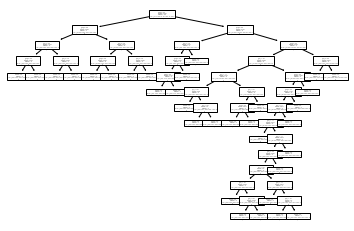

In [ ]:
# Utiliza run_knn() definida no topo da seção Árvores de Decisão
trees, best_key = run_tree(soybean_X_train, soybean_X_test, soybean_X_val,
                           soybean_y_train, soybean_y_test, soybean_y_val,
                           "Soybean Dataset"
                           )

# Visualização gráfica da melhor árvore
t.plot_tree(trees[best_key])

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(trees, best_key,
                        soybean_X, soybean_y,
                        "Árvores de Decisão",
                        "Soybean Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(trees, best_key,
       soybean_dataset,
       soybean_X_val, soybean_y_val,
       "Soybean Dataset", "Classes"
       )

# print(soybean_dataset)

#### Breast Cancer - Árvores de Decisão

Scores (Pontuações) - Árvores de Decisão - Breast Cancer Dataset
tree_g_b -> 75.36231884057972 
tree_e_b -> 75.36231884057972 
tree_g_r -> 62.31884057971014 
tree_e_r -> 66.66666666666666 


Melhor score: tree_g_b -> 75.36231884057972

Accuracy (Precisão / Acurácia) do melhor modelo treinado
tree_g_b -> 0.6811594202898551 

=--------=
Embaralhamentos - Árvores de Decisão - Breast Cancer Dataset
Melhor modelo -> DecisionTreeClassifier()

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
tree_g_b -> 85.5072463768116 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
tree_g_b -> 88.40579710144928 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
tree_g_b -> 84.05797101449275 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
tree_g_b -> 75.3623188405797 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
tree_g_b -> 81.15942028985508 

=--------=
Recall do DecisionTreeClassifier()

A classe no-recurrence-events tem um recall de 0.73
A classe recurrence-events tem um recall de 0.55




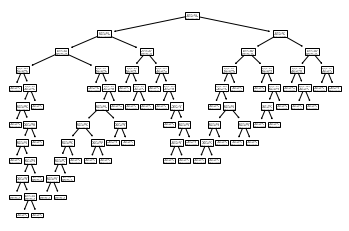

In [ ]:
# Utiliza run_knn() definida no topo da seção Árvores de Decisão
trees, best_key = run_tree(cancer_X_train, cancer_X_test, cancer_X_val,
                           cancer_y_train, cancer_y_test, cancer_y_val,
                           "Breast Cancer Dataset"
                           )

# Visualização gráfica da melhor árvore
t.plot_tree(trees[best_key])

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(trees, best_key,
                        cancer_X, cancer_y,
                        "Árvores de Decisão",
                        "Breast Cancer Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(trees, best_key,
       breast_cancer_dataset,
       cancer_X_val, cancer_y_val,
       "Breast Cancer Dataset", "Class"
       )

# print(breast_cancer_dataset)

#### Heart Disease - Árvores de Decisão

Scores (Pontuações) - Árvores de Decisão - Heart Disease Dataset
tree_g_b -> 45.94594594594595 
tree_e_b -> 51.35135135135135 
tree_g_r -> 56.75675675675676 
tree_e_r -> 55.4054054054054 


Melhor score: tree_g_r -> 56.75675675675676

Accuracy (Precisão / Acurácia) do melhor modelo treinado
tree_g_r -> 0.4864864864864865 

=--------=
Embaralhamentos - Árvores de Decisão - Heart Disease Dataset
Melhor modelo -> DecisionTreeClassifier(splitter='random')

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
tree_g_r -> 81.08108108108108 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
tree_g_r -> 74.32432432432432 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
tree_g_r -> 75.67567567567568 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
tree_g_r -> 77.02702702702703 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
tree_g_r -> 74.32432432432432 

=--------=
Recall do DecisionTreeClassifier(splitter='random')

A classe 2 tem um recall de 0.80
A classe 1 tem um recall de 0.15
A c

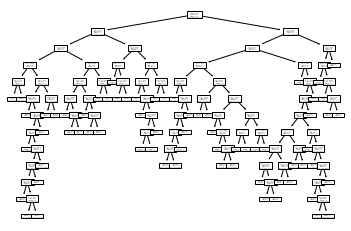

In [ ]:
# Utiliza run_knn() definida no topo da seção Árvores de Decisão
trees, best_key = run_tree(heart_X_train, heart_X_test, heart_X_val,
                          heart_y_train, heart_y_test, heart_y_val,
                          "Heart Disease Dataset"
                          )

# Visualização gráfica da melhor árvore
t.plot_tree(trees[best_key])

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(trees, best_key,
                        heart_X, heart_y,
                        "Árvores de Decisão",
                        "Heart Disease Dataset")


# Recall de cada classe para os mesmos experimentos realizados
recall(trees, best_key,
       heart_disease_dataset,
       heart_X_val, heart_y_val,
       "Heart Disease Dataset", "num"
      )

# print(heart_disease_dataset)

---

#### Car Evaluation - Árvores de Decisão

Scores (Pontuações) - Árvores de Decisão - Car Evaluation Dataset
tree_g_b -> 96.06481481481481 
tree_e_b -> 96.52777777777779 
tree_g_r -> 94.9074074074074 
tree_e_r -> 95.60185185185185 


Melhor score: tree_e_b -> 96.52777777777779

Accuracy (Precisão / Acurácia) do melhor modelo treinado
tree_e_b -> 0.9675925925925926 

=--------=
Embaralhamentos - Árvores de Decisão - Car Evaluation Dataset
Melhor modelo -> DecisionTreeClassifier(criterion='entropy')

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
tree_e_b -> 97.22222222222223 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
tree_e_b -> 99.07407407407408 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
tree_e_b -> 98.37962962962963 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
tree_e_b -> 97.22222222222223 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
tree_e_b -> 97.91666666666667 

=--------=
Recall do DecisionTreeClassifier(criterion='entropy')

A classe unacc tem um recall de 0.93
A classe acc tem um recall

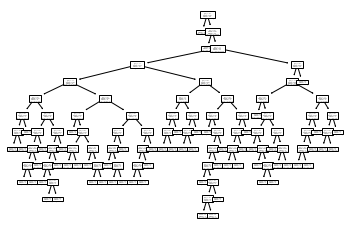

In [ ]:
# Utiliza run_knn() definida no topo da seção Árvores de Decisão
trees, best_key = run_tree(car_X_train, car_X_test, car_X_val,
                           car_y_train, car_y_test, car_y_val,
                           "Car Evaluation Dataset"
                           )

# Visualização gráfica da melhor árvore
t.plot_tree(trees[best_key])

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(trees, best_key,
                        car_X, car_y,
                        "Árvores de Decisão",
                        "Car Evaluation Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(trees, best_key,
       car_eval_dataset,
       car_X_val, car_y_val,
       "Car Evaluation Dataset", "car_acceptability"
      )

# print(car_eval_dataset)

###  Gaussian Naive Bayes

#### Define run_naive_bayes()

In [ ]:
from sklearn.naive_bayes import GaussianNB




def run_naive_bayes(X_train, X_test, X_val, y_train, y_test, y_val, dataset_name):
  # Gera os classificadores Gaussian Naive Bayes
  bayes = {
      'gnb_9': GaussianNB(var_smoothing = 1e-9),
      'gnb_8': GaussianNB(var_smoothing = 1e-8),
      'gnb_7': GaussianNB(var_smoothing = 1e-7),
      'gnb_6': GaussianNB(var_smoothing = 1e-6),
      'gnb_5': GaussianNB(var_smoothing = 1e-5),
      'gnb_4': GaussianNB(var_smoothing = 1e-4),
      'gnb_3': GaussianNB(var_smoothing = 1e-3),
  }

  # Treina os classificadores gerados
  bayes['gnb_9'].fit(X_train, y_train)
  bayes['gnb_8'].fit(X_train, y_train)
  bayes['gnb_7'].fit(X_train, y_train)
  bayes['gnb_6'].fit(X_train, y_train)
  bayes['gnb_5'].fit(X_train, y_train)
  bayes['gnb_4'].fit(X_train, y_train)
  bayes['gnb_3'].fit(X_train, y_train)

  # Observa a pontuação dos modelos treinados
  scores = {
      'gnb_9': bayes['gnb_9'].score(X_train, y_train) * 100,
      'gnb_8': bayes['gnb_8'].score(X_train, y_train) * 100,
      'gnb_7': bayes['gnb_7'].score(X_train, y_train) * 100,
      'gnb_6': bayes['gnb_6'].score(X_train, y_train) * 100,
      'gnb_5': bayes['gnb_5'].score(X_train, y_train) * 100,
      'gnb_4': bayes['gnb_4'].score(X_train, y_train) * 100,
      'gnb_3': bayes['gnb_3'].score(X_train, y_train) * 100,
  }

  print(f"Scores (Pontuações) - Gaussian Naive Bayes - {dataset_name}")
  print(f"gnb_9 -> {  scores['gnb_9'] } ")
  print(f"gnb_8 -> {  scores['gnb_8'] } ")
  print(f"gnb_7 -> {  scores['gnb_7'] } ")
  print(f"gnb_6 -> {  scores['gnb_6'] } ")
  print(f"gnb_5 -> {  scores['gnb_5'] } ")
  print(f"gnb_4 -> {  scores['gnb_4'] } ")
  print(f"gnb_3 -> {  scores['gnb_3'] } ", end="\n\n\n")

  max_key = max(scores, key=scores.get)
  max_score = max(scores)
  print(f"Melhor score: { max_key } -> { scores[max_key] }", end="\n\n")

  # Observa a acurácia do melhor modelo treinado
  print(f"Accuracy (Precisão / Acurácia) do melhor modelo treinado")
  y_pred = bayes[max_key].predict(X_val)
  print(f"{ max_key } -> {sum(y_val == y_pred) / y_val.shape[0]} ", end="\n\n")

  return bayes, max_key


#### Iris - Gaussian Naive Bayes

In [ ]:
# Utiliza run_naive_bayes() definida no topo da seção Gaussian Naive Bayes
gnbs, best_key = run_naive_bayes(iris_X_train, iris_X_test, iris_X_val,
                                 iris_y_train, iris_y_test, iris_y_val,
                                 "Iris Dataset"
                                 )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(gnbs, best_key,
                        iris_X, iris_y,
                        "Gaussian Naive Bayes",
                        "Iris Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(gnbs, best_key,
       iris_dataset,
       iris_X_val, iris_y_val,
       "Iris Dataset", "species"
       )

# print(iris_dataset)

Scores (Pontuações) - Gaussian Naive Bayes - Iris Dataset
gnb_9 -> 97.2972972972973 
gnb_8 -> 97.2972972972973 
gnb_7 -> 97.2972972972973 
gnb_6 -> 97.2972972972973 
gnb_5 -> 97.2972972972973 
gnb_4 -> 97.2972972972973 
gnb_3 -> 97.2972972972973 


Melhor score: gnb_9 -> 97.2972972972973

Accuracy (Precisão / Acurácia) do melhor modelo treinado
gnb_9 -> 0.918918918918919 

=--------=
Embaralhamentos - Gaussian Naive Bayes - Iris Dataset
Melhor modelo -> GaussianNB()

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
gnb_9 -> 94.5945945945946 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
gnb_9 -> 100.0 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
gnb_9 -> 97.29729729729729 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
gnb_9 -> 97.29729729729729 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
gnb_9 -> 89.1891891891892 

=--------=
Recall do GaussianNB()

A classe Iris_setosa tem um recall de 1.00
A classe Iris_versicolor tem um recall de 0.83
A classe Iris_virginic

#### Soybean - Gaussian Naive Bayes

In [ ]:
# Utiliza run_naive_bayes() definida no topo da seção Gaussian Naive Bayes
gnbs, best_key = run_naive_bayes(soybean_X_train, soybean_X_test, soybean_X_val,
                                 soybean_y_train, soybean_y_test, soybean_y_val,
                                 "Soybean Dataset"
                                 )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(gnbs, best_key,
                        soybean_X, soybean_y,
                        "Gaussian Naive Bayes",
                        "Soybean Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(gnbs, best_key,
       soybean_dataset,
       soybean_X_val, soybean_y_val,
       "Soybean Dataset", "Classes"
       )

# print(soybean_dataset)

Scores (Pontuações) - Gaussian Naive Bayes - Soybean Dataset
gnb_9 -> 82.57575757575758 
gnb_8 -> 82.57575757575758 
gnb_7 -> 82.57575757575758 
gnb_6 -> 82.57575757575758 
gnb_5 -> 82.57575757575758 
gnb_4 -> 82.57575757575758 
gnb_3 -> 87.87878787878788 


Melhor score: gnb_3 -> 87.87878787878788

Accuracy (Precisão / Acurácia) do melhor modelo treinado
gnb_3 -> 0.8636363636363636 

=--------=
Embaralhamentos - Gaussian Naive Bayes - Soybean Dataset
Melhor modelo -> GaussianNB(var_smoothing=0.001)

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
gnb_3 -> 83.33333333333333 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
gnb_3 -> 89.39393939393939 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
gnb_3 -> 90.9090909090909 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
gnb_3 -> 87.87878787878788 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
gnb_3 -> 86.36363636363636 

=--------=
Recall do GaussianNB(var_smoothing=0.001)

A classe diaporthe-stem-canker tem um recall d

#### Breast Cancer - Gaussian Naive Bayes

In [ ]:
# Utiliza run_naive_bayes() definida no topo da seção Gaussian Naive Bayes
gnbs, best_key = run_naive_bayes(cancer_X_train, cancer_X_test, cancer_X_val,
                                 cancer_y_train, cancer_y_test, cancer_y_val,
                                 "Breast Cancer Dataset"
                                 )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(gnbs, best_key,
                        cancer_X, cancer_y,
                        "Gaussian Naive Bayes",
                        "Breast Cancer Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(gnbs, best_key,
       breast_cancer_dataset,
       cancer_X_val, cancer_y_val,
       "Breast Cancer Dataset", "Class"
       )

# print(breast_cancer_dataset)

Scores (Pontuações) - Gaussian Naive Bayes - Breast Cancer Dataset
gnb_9 -> 75.36231884057972 
gnb_8 -> 75.36231884057972 
gnb_7 -> 75.36231884057972 
gnb_6 -> 75.36231884057972 
gnb_5 -> 75.36231884057972 
gnb_4 -> 75.36231884057972 
gnb_3 -> 75.36231884057972 


Melhor score: gnb_9 -> 75.36231884057972

Accuracy (Precisão / Acurácia) do melhor modelo treinado
gnb_9 -> 0.7246376811594203 

=--------=
Embaralhamentos - Gaussian Naive Bayes - Breast Cancer Dataset
Melhor modelo -> GaussianNB()

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
gnb_9 -> 73.91304347826087 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
gnb_9 -> 76.81159420289855 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
gnb_9 -> 75.3623188405797 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
gnb_9 -> 65.21739130434783 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
gnb_9 -> 73.91304347826087 

=--------=
Recall do GaussianNB()

A classe no-recurrence-events tem um recall de 0.86
A classe recurrence-

#### Heart Disease - Gaussian Naive Bayes

In [ ]:
# Utiliza run_naive_bayes() definida no topo da seção Gaussian Naive Bayes
gnbs, best_key = run_naive_bayes(heart_X_train, heart_X_test, heart_X_val,
                                 heart_y_train, heart_y_test, heart_y_val,
                                 "Heart Disease Dataset"
                                 )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(gnbs, best_key,
                        heart_X, heart_y,
                        "Gaussian Naive Bayes",
                        "Heart Disease Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(gnbs, best_key,
       heart_disease_dataset,
       heart_X_val, heart_y_val,
       "Heart Disease Dataset", "num"
       )


# print(heart_disease_dataset)

Scores (Pontuações) - Gaussian Naive Bayes - Heart Disease Dataset
gnb_9 -> 58.108108108108105 
gnb_8 -> 59.45945945945946 
gnb_7 -> 62.83783783783784 
gnb_6 -> 65.54054054054053 
gnb_5 -> 64.1891891891892 
gnb_4 -> 64.86486486486487 
gnb_3 -> 61.48648648648649 


Melhor score: gnb_6 -> 65.54054054054053

Accuracy (Precisão / Acurácia) do melhor modelo treinado
gnb_6 -> 0.5675675675675675 

=--------=
Embaralhamentos - Gaussian Naive Bayes - Heart Disease Dataset
Melhor modelo -> GaussianNB(var_smoothing=1e-06)

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
gnb_6 -> 58.108108108108105 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
gnb_6 -> 67.56756756756756 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
gnb_6 -> 63.513513513513516 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
gnb_6 -> 63.513513513513516 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
gnb_6 -> 58.108108108108105 

=--------=
Recall do GaussianNB(var_smoothing=1e-06)

A classe 2 tem um recall de 0

#### Car Evaluation - Gaussian Naive Bayes

In [ ]:
# Utiliza run_naive_bayes() definida no topo da seção Gaussian Naive Bayes
gnbs, best_key = run_naive_bayes(car_X_train, car_X_test, car_X_val,
                                 car_y_train, car_y_test, car_y_val,
                                 "Car Evaluation Dataset"
                                 )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(gnbs, best_key,
                        car_X, car_y,
                        "Gaussian Naive Bayes",
                        "Car Evaluation Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(gnbs, best_key,
       car_eval_dataset,
       car_X_val, car_y_val,
       "Car Evaluation Dataset", "car_acceptability"
       )


# print(car_eval_dataset)

Scores (Pontuações) - Gaussian Naive Bayes - Car Evaluation Dataset
gnb_9 -> 77.63615295480881 
gnb_8 -> 78.21552723059096 
gnb_7 -> 79.37427578215527 
gnb_6 -> 80.9965237543453 
gnb_5 -> 81.80764774044033 
gnb_4 -> 83.66164542294322 
gnb_3 -> 84.70451911935109 


Melhor score: gnb_3 -> 84.70451911935109

Accuracy (Precisão / Acurácia) do melhor modelo treinado
gnb_3 -> 0.8263888888888888 

=--------=
Embaralhamentos - Gaussian Naive Bayes - Car Evaluation Dataset
Melhor modelo -> GaussianNB(var_smoothing=0.001)

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
gnb_3 -> 85.18518518518519 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
gnb_3 -> 83.79629629629629 

Embaralhamento 2 - Accuracy (Precisão / Acurácia)
gnb_3 -> 83.79629629629629 

Embaralhamento 3 - Accuracy (Precisão / Acurácia)
gnb_3 -> 83.79629629629629 

Embaralhamento 4 - Accuracy (Precisão / Acurácia)
gnb_3 -> 83.79629629629629 

=--------=
Recall do GaussianNB(var_smoothing=0.001)

A classe unacc tem um recall de 

---

### Redes Neurais MLP

#### Define run_mlp()

In [ ]:
from sklearn.neural_network import MLPClassifier




def run_mlp(X_train, X_test, X_val, y_train, y_test, y_val, dataset_name):

  # Gera os classificadores MLP
  mlps = {
      'mlp_a5_10': MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(10,), random_state=1, max_iter=500),
      'mlp_a5_15': MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(15,), random_state=1, max_iter=500),
      'mlp_a5_50': MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(50,), random_state=1, max_iter=500),

      'mlp_a3_10': MLPClassifier(solver='sgd', alpha=1e-3, hidden_layer_sizes=(10,), random_state=1, max_iter=500),
      'mlp_a3_15': MLPClassifier(solver='sgd', alpha=1e-3, hidden_layer_sizes=(15,), random_state=1, max_iter=500),
      'mlp_a3_50': MLPClassifier(solver='sgd', alpha=1e-3, hidden_layer_sizes=(50,), random_state=1, max_iter=500),

      'mlp_a1_10': MLPClassifier(solver='sgd', alpha=1e-1, hidden_layer_sizes=(10,), random_state=1, max_iter=500),
      'mlp_a1_15': MLPClassifier(solver='sgd', alpha=1e-1, hidden_layer_sizes=(15,), random_state=1, max_iter=500),
      'mlp_a1_50': MLPClassifier(solver='sgd', alpha=1e-1, hidden_layer_sizes=(50,), random_state=1, max_iter=500),
  }

  # Treina o(s) classificador(es) gerado(s)
  mlps['mlp_a5_10'].fit(X_train, y_train)
  mlps['mlp_a5_15'].fit(X_train, y_train)
  mlps['mlp_a5_50'].fit(X_train, y_train)

  mlps['mlp_a3_10'].fit(X_train, y_train)
  mlps['mlp_a3_15'].fit(X_train, y_train)
  mlps['mlp_a3_50'].fit(X_train, y_train)

  mlps['mlp_a1_10'].fit(X_train, y_train)
  mlps['mlp_a1_15'].fit(X_train, y_train)
  mlps['mlp_a1_50'].fit(X_train, y_train)

  # Observa a pontuação dos modelos treinados
  scores = {
      'mlp_a5_10': mlps['mlp_a5_10'].score(X_train, y_train) * 100,
      'mlp_a5_15': mlps['mlp_a5_15'].score(X_train, y_train) * 100,
      'mlp_a5_50': mlps['mlp_a5_50'].score(X_train, y_train) * 100,

      'mlp_a3_10': mlps['mlp_a3_10'].score(X_train, y_train) * 100,
      'mlp_a3_15': mlps['mlp_a3_15'].score(X_train, y_train) * 100,
      'mlp_a3_50': mlps['mlp_a3_50'].score(X_train, y_train) * 100,

      'mlp_a1_10': mlps['mlp_a1_10'].score(X_train, y_train) * 100,
      'mlp_a1_15': mlps['mlp_a1_15'].score(X_train, y_train) * 100,
      'mlp_a1_50': mlps['mlp_a1_50'].score(X_train, y_train) * 100,
  }
  print(f"\nScore (Pontuação) de cada teste - MLP - {dataset_name}")
  print(f"a = 0.00001 / hidden = 10 -> { scores['mlp_a5_10'] } ")
  print(f"a = 0.00001 / hidden = 15 -> { scores['mlp_a5_15'] } ")
  print(f"a = 0.00001 / hidden = 50 -> { scores['mlp_a5_50'] } ", end="\n\n")
  print(f"a = 0.001 / hidden = 10 -> { scores['mlp_a3_10'] } ")
  print(f"a = 0.001 / hidden = 15 -> { scores['mlp_a3_15'] } ")
  print(f"a = 0.001 / hidden = 5 -> { scores['mlp_a3_50'] } ", end="\n\n")
  print(f"a = 0.1 / hidden = 10 -> { scores['mlp_a1_10'] } ")
  print(f"a = 0.1 / hidden = 15 -> { scores['mlp_a1_15'] } ")
  print(f"a = 0.1 / hidden = 50 -> { scores['mlp_a1_50'] } ", end="\n\n\n")

  max_key = max(scores, key=scores.get)
  max_score = max(scores)
  print(f"Melhor score: { max_key } -> { scores[max_key] }", end="\n\n")

  # Observa a acurácia do melhor modelo treinado
  print(f"Accuracy (Precisão / Acurácia) do melhor modelo treinado")
  y_pred = mlps[max_key].predict(X_val)
  print(f"{ max_key } -> {sum(y_val == y_pred) / y_val.shape[0]} ", end="\n\n")

  return mlps, max_key


#### Iris - Redes Neurais MLP

In [ ]:
# Utiliza run_mlp() definida no topo da seção Redes Neurais MLP
mlps, best_key = run_mlp(iris_X_train, iris_X_test, iris_X_val,
                         iris_y_train, iris_y_test, iris_y_val,
                         "Iris Dataset"
                         )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(mlps, best_key,
                        iris_X, iris_y,
                        "Multi Layer Perceptron",
                        "Iris Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(mlps, best_key,
       iris_dataset,
       iris_X_val, iris_y_val,
       "Iris Dataset", "species"
       )

# print(iris_dataset)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi


Score (Pontuação) de cada teste - MLP - Iris Dataset
a = 0.00001 / hidden = 10 -> 97.2972972972973 
a = 0.00001 / hidden = 15 -> 94.5945945945946 
a = 0.00001 / hidden = 50 -> 98.64864864864865 

a = 0.001 / hidden = 10 -> 97.2972972972973 
a = 0.001 / hidden = 15 -> 94.5945945945946 
a = 0.001 / hidden = 5 -> 98.64864864864865 

a = 0.1 / hidden = 10 -> 97.2972972972973 
a = 0.1 / hidden = 15 -> 94.5945945945946 
a = 0.1 / hidden = 50 -> 98.64864864864865 


Melhor score: mlp_a5_50 -> 98.64864864864865

Accuracy (Precisão / Acurácia) do melhor modelo treinado
mlp_a5_50 -> 0.972972972972973 

=--------=
Embaralhamentos - Multi Layer Perceptron - Iris Dataset
Melhor modelo -> MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50,), max_iter=500,
              random_state=1, solver='sgd')

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
mlp_a5_50 -> 97.29729729729729 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
mlp_a5_50 -> 97.29729729729729 

Embaralhamento 2 - Accuracy (Precisão

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### Soybean - Redes Neurais MLP

In [ ]:
# Utiliza run_mlp() definida no topo da seção Redes Neurais MLP
mlps, best_key = run_mlp(soybean_X_train, soybean_X_test, soybean_X_val,
                         soybean_y_train, soybean_y_test, soybean_y_val,
                         "Soybean Dataset"
                         )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(mlps, best_key,
                        soybean_X, soybean_y,
                        "Multi Layer Perceptron",
                        "Soybean Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(mlps, best_key,
       soybean_dataset,
       soybean_X_val, soybean_y_val,
       "Soybean Dataset", "Classes"
       )

# print(soybean_dataset)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi


Score (Pontuação) de cada teste - MLP - Soybean Dataset
a = 0.00001 / hidden = 10 -> 55.3030303030303 
a = 0.00001 / hidden = 15 -> 53.78787878787878 
a = 0.00001 / hidden = 50 -> 77.27272727272727 

a = 0.001 / hidden = 10 -> 55.3030303030303 
a = 0.001 / hidden = 15 -> 53.78787878787878 
a = 0.001 / hidden = 5 -> 77.27272727272727 

a = 0.1 / hidden = 10 -> 55.3030303030303 
a = 0.1 / hidden = 15 -> 53.78787878787878 
a = 0.1 / hidden = 50 -> 77.27272727272727 


Melhor score: mlp_a5_50 -> 77.27272727272727

Accuracy (Precisão / Acurácia) do melhor modelo treinado
mlp_a5_50 -> 0.6818181818181818 

=--------=
Embaralhamentos - Multi Layer Perceptron - Soybean Dataset
Melhor modelo -> MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50,), max_iter=500,
              random_state=1, solver='sgd')

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
mlp_a5_50 -> 77.27272727272727 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
mlp_a5_50 -> 77.27272727272727 

Embaralhamento 2 - Accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### Breast Cancer - Redes Neurais MLP

In [ ]:
# Utiliza run_mlp() definida no topo da seção Redes Neurais MLP
mlps, best_key = run_mlp(cancer_X_train, cancer_X_test, cancer_X_val,
                         cancer_y_train, cancer_y_test, cancer_y_val,
                         "Breast Cancer Dataset"
                         )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(mlps, best_key,
                        cancer_X, cancer_y,
                        "Multi Layer Perceptron",
                        "Breast Cancer Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(mlps, best_key,
       breast_cancer_dataset,
       cancer_X_val, cancer_y_val,
       "Breast Cancer Dataset", "Class"
       )

# print(breast_cancer_dataset)


Score (Pontuação) de cada teste - MLP - Breast Cancer Dataset
a = 0.00001 / hidden = 10 -> 71.73913043478261 
a = 0.00001 / hidden = 15 -> 69.56521739130434 
a = 0.00001 / hidden = 50 -> 74.63768115942028 

a = 0.001 / hidden = 10 -> 71.73913043478261 
a = 0.001 / hidden = 15 -> 69.56521739130434 
a = 0.001 / hidden = 5 -> 74.63768115942028 

a = 0.1 / hidden = 10 -> 71.73913043478261 
a = 0.1 / hidden = 15 -> 69.56521739130434 
a = 0.1 / hidden = 50 -> 74.63768115942028 


Melhor score: mlp_a5_50 -> 74.63768115942028

Accuracy (Precisão / Acurácia) do melhor modelo treinado
mlp_a5_50 -> 0.7246376811594203 

=--------=
Embaralhamentos - Multi Layer Perceptron - Breast Cancer Dataset
Melhor modelo -> MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50,), max_iter=500,
              random_state=1, solver='sgd')

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
mlp_a5_50 -> 75.3623188405797 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
mlp_a5_50 -> 73.91304347826087 

Embaralhament

#### Heart Disease - Redes Neurais MLP

In [ ]:
# Utiliza run_mlp() definida no topo da seção Redes Neurais MLP
mlps, best_key = run_mlp(heart_X_train, heart_X_test, heart_X_val,
                         heart_y_train, heart_y_test, heart_y_val,
                         "Heart Disease Dataset"
                         )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(mlps, best_key,
                        heart_X, heart_y,
                        "Multi Layer Perceptron",
                        "Heart Disease Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(mlps, best_key,
       heart_disease_dataset,
       heart_X_val, heart_y_val,
       "Heart Disease Dataset", "num"
       )


# print(heart_disease_dataset)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi


Score (Pontuação) de cada teste - MLP - Heart Disease Dataset
a = 0.00001 / hidden = 10 -> 53.37837837837838 
a = 0.00001 / hidden = 15 -> 54.054054054054056 
a = 0.00001 / hidden = 50 -> 20.945945945945947 

a = 0.001 / hidden = 10 -> 53.37837837837838 
a = 0.001 / hidden = 15 -> 54.054054054054056 
a = 0.001 / hidden = 5 -> 20.945945945945947 

a = 0.1 / hidden = 10 -> 53.37837837837838 
a = 0.1 / hidden = 15 -> 54.054054054054056 
a = 0.1 / hidden = 50 -> 20.945945945945947 


Melhor score: mlp_a5_15 -> 54.054054054054056

Accuracy (Precisão / Acurácia) do melhor modelo treinado
mlp_a5_15 -> 0.5405405405405406 

=--------=
Embaralhamentos - Multi Layer Perceptron - Heart Disease Dataset
Melhor modelo -> MLPClassifier(alpha=1e-05, hidden_layer_sizes=(15,), max_iter=500,
              random_state=1, solver='sgd')

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
mlp_a5_15 -> 54.054054054054056 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
mlp_a5_15 -> 52.7027027027027 

Embar

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


#### Car Evaluation - Redes Neurais MLP

In [ ]:
# Utiliza run_mlp() definida no topo da seção Redes Neurais MLP
mlps, best_key = run_mlp(car_X_train, car_X_test, car_X_val,
                         car_y_train, car_y_test, car_y_val,
                         "Car Evaluation Dataset"
                         )

# O melhor modelo deve ser aplicado a 5 diferentes embaralhamentos do dataframe
five_shuffle_validation(mlps, best_key,
                        car_X, car_y,
                        "Multi Layer Perceptron",
                        "Car Evaluation Dataset"
                        )


# Recall de cada classe para os mesmos experimentos realizados
recall(mlps, best_key,
       car_eval_dataset,
       car_X_val, car_y_val,
       "Iris Dataset", "car_acceptability"
       )


# print(car_eval_dataset)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi


Score (Pontuação) de cada teste - MLP - Car Evaluation Dataset
a = 0.00001 / hidden = 10 -> 84.58864426419467 
a = 0.00001 / hidden = 15 -> 87.36964078794901 
a = 0.00001 / hidden = 50 -> 87.60139049826188 

a = 0.001 / hidden = 10 -> 84.58864426419467 
a = 0.001 / hidden = 15 -> 87.36964078794901 
a = 0.001 / hidden = 5 -> 87.60139049826188 

a = 0.1 / hidden = 10 -> 84.47276940903824 
a = 0.1 / hidden = 15 -> 87.25376593279258 
a = 0.1 / hidden = 50 -> 87.13789107763616 


Melhor score: mlp_a5_50 -> 87.60139049826188

Accuracy (Precisão / Acurácia) do melhor modelo treinado
mlp_a5_50 -> 0.8518518518518519 

=--------=
Embaralhamentos - Multi Layer Perceptron - Car Evaluation Dataset
Melhor modelo -> MLPClassifier(alpha=1e-05, hidden_layer_sizes=(50,), max_iter=500,
              random_state=1, solver='sgd')

Embaralhamento 0 - Accuracy (Precisão / Acurácia)
mlp_a5_50 -> 87.73148148148148 

Embaralhamento 1 - Accuracy (Precisão / Acurácia)
mlp_a5_50 -> 86.80555555555556 

Embaralham

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


---

## Questão 2) Treinamento e plot da linha do perceptron

In [ ]:
from sklearn.linear_model import Perceptron
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# Decalra o texto da base de dados
base2_txt = """0.352986208	0.537488552	-1
0.276857226	0.467674224	-1
0.105010988	0.137068873	-1
0.283379246	0.712693396	-1
0.401522429	0.999046274	-1
0.194928845	0.842216629	-1
0.091200095	0.240553817	-1
0.201709163	0.423112192	-1
0.412724512	0.103366811	-1
0.390024662	0.674095268	-1
0.253946136	0.870661906	-1
0.319595991	0.188168832	-1
0.02582037	0.340124182	-1
0.32437045	0.242616605	-1
0.284688547	0.301796732	-1
0.293704186	0.280196733	-1
0.002061268	0.278638011	-1
0.388086928	0.657880221	-1
0.007573701	0.253572328	-1
0.346812379	0.428423462	-1
0.088234195	0.228889024	-1
0.304167594	0.745259311	-1
0.385475554	0.242166754	-1
0.025821915	0.462636938	-1
0.130845155	0.897468623	-1
0.118140894	0.640635419	-1
0.371433249	0.561375494	-1
0.320133304	0.958621759	-1
0.117340298	0.120493836	-1
0.300659013	0.490919162	-1
0.145622687	0.600395771	-1
0.322382968	0.904896787	-1
0.108232317	0.005518819	-1
0.428755621	0.904387456	-1
0.245479447	0.455373026	-1
0.411032354	0.660285115	-1
0.201499071	0.064474163	-1
0.259014468	0.045369159	-1
0.314090006	0.0417409	-1
0.081801708	0.721848041	-1
0.318121838	0.169665396	-1
0.073391273	0.51781	-1
0.369468741	0.164385935	-1
0.292440577	0.072713837	-1
0.185130217	0.414861614	-1
0.115930997	0.432248164	-1
0.094837563	0.252668201	-1
0.092827366	0.129332937	-1
0.010020941	0.213505931	-1
0.466122652	0.300731856	-1
0.767207656	0.717329143	1
1.009459775	0.557690582	1
0.642510054	0.216078597	1
1.01179914	0.654209782	1
0.917419639	0.136317844	1
0.711758624	0.478008253	1
0.749290475	0.87864423	1
0.732951181	0.526926311	1
0.912501397	0.726567116	1
0.721529253	0.827465032	1
0.782240488	0.764614433	1
0.665200476	0.202352105	1
0.784779541	0.808750409	1
0.648538844	0.900470477	1
0.77929143	0.911756887	1
0.744473279	0.865181633	1
0.556936943	0.222050975	1
0.860790653	0.336019672	1
0.552684104	0.846482472	1
0.883507701	0.05392897	1
0.814121605	0.895974525	1
0.95604652	0.071662356	1
0.829389736	0.077441217	1
0.694290874	0.058652877	1
0.713275388	0.036236543	1
0.932805538	0.033616911	1
0.876504723	0.150458805	1
0.666768613	0.658342463	1
0.988315409	0.631755628	1
0.767496693	0.582560619	1
0.966501883	0.596844467	1
0.81683548	0.84249495	1
1.012300934	0.239783931	1
0.597143343	0.984627518	1
1.009721138	0.357101893	1
0.779113112	0.411416445	1
0.660218544	0.256206161	1
0.889257283	0.42714497	1
1.013982371	0.512074115	1
0.542524509	0.59977703	1
0.68851833	0.12803819	1
0.633220264	0.348640225	1
0.823703275	0.403553701	1
0.659172194	0.117951665	1
0.860034137	0.21515677	1
1.019910703	0.102648321	1
0.633405013	0.476389606	1
0.879527978	0.25567791	1
0.555420392	0.258291271	1
0.638833524	0.224852515	1"""

# Escreve base2_txt no ambiente de arquivos do google colab
with open('base2.txt', 'w') as writefile:
    writefile.write( base2_txt )

# Download do dataset
# perceptron_dataset = pd.read_csv(
#     'drive/MyDrive/Projeto_2VA_IA/base2.txt'
# )
perceptron_dataset = pd.read_csv('base2.txt')



# Divide a coluna única em 3 colunas
perceptron_dataset = perceptron_dataset.iloc[:,0].str.split(r'\t', expand=True)


# Recoloca a primeira linha que foi perdida na operação .plit(r"\t")
perceptron_dataset = perceptron_dataset.append(dict(zip(perceptron_dataset.columns, ["0.352986208", "0.537488552", "-1"])), ignore_index=True)
perceptron_dataset.rename(index = lambda x: x+1 if x != 99 else 0, inplace=True)
perceptron_dataset.sort_index(inplace=True)


# Renomeia as colunas
rename_map = {
    0: 'x',
    1: 'y',
    2: 'target', # (target)
}
perceptron_dataset.rename(columns = rename_map, inplace=True, errors='raise')


# Tranforma o conteúdo str em float ou int
perceptron_dataset['x'] = perceptron_dataset['x'].apply(lambda x: float(x))
perceptron_dataset['y'] = perceptron_dataset['y'].apply(lambda y: float(y))
perceptron_dataset['target'] = perceptron_dataset['target'].apply(lambda target: int(target))


# Divide em X (amostras) e y (classes)
X = perceptron_dataset.drop(['target'], axis = 1)
target = perceptron_dataset['target']


# Cria e treina o modelo do perceptron
perceptron_0 = Perceptron(alpha=0.1, tol=1e-3, random_state=0, max_iter=1000)
perceptron_1 = Perceptron(alpha=0.01, tol=1e-3, random_state=0, max_iter=1000)
perceptron_2 = Perceptron(alpha=0.001, tol=1e-3, random_state=0, max_iter=1000)
perceptron_3 = Perceptron(alpha=0.0001, tol=1e-3, random_state=0, max_iter=1000)
perceptron_4 = Perceptron(alpha=0.00001, tol=1e-3, random_state=0, max_iter=1000)

perceptron_0.fit(X, target)
perceptron_1.fit(X, target)
perceptron_2.fit(X, target)
perceptron_3.fit(X, target)
perceptron_4.fit(X, target)

# Print scores
# print(perceptron_0.score(X, target))
# print(perceptron_1.score(X, target))
# print(perceptron_2.score(X, target))
# print(perceptron_3.score(X, target))
# print(perceptron_4.score(X, target))



# Plota a reta encontrada
point_colors = ['red' if value == 1 else 'blue' for value in target]
column1 = X['x']
column2 = X['y']

def plot_perceptron_line(perceptron, perceptron_name):

  w = perceptron.coef_[0] # w1 e w2 -> 2 pesos (2 inputs/features com 1 peso cada)

  a = - w[0] / w[1] # 'a' da reta (a * xx + b) == slope == m

  theta = perceptron.intercept_[0] # bias
  b = - theta / w[1] # 'b' da reta (a * xx + b)

  xx = np.linspace(0.45, 0.55) # inputs da reta
  yy = a * xx + b # ouputs da reta


  plt.figure(figsize=(4, 2.5), dpi=80)
  # # plt.scatter(column1, column2, c = point_colors, s = 1, cmap='Paired_r', edgecolors='k')
  plt.scatter(column1, column2, c = point_colors, s = 1, cmap='Paired_r')
  # X.plot.scatter('x', 'y', c = point_colors, s = 1)
  plt.title(perceptron_name)
  plt.plot(xx, yy, 'k-')
  plt.grid(True)
  plt.xlabel("Eixo x")
  plt.ylabel("Eixo y")

  print(f"Equação geral da boundary line -> w1 * x + w2 * y + b = 0")
  print(f"Pesos encontrados: w1 = {w[0]}, w2 = {w[1]}, theta = {theta}")
  print(f"Inputs: x, y, {theta}")

  plt.show()




Equação geral da boundary line -> w1 * x + w2 * y + b = 0
Pesos encontrados: w1 = 2.1598817369999996, w2 = -0.12890982500000006, theta = -1.0
Inputs: x, y, -1.0


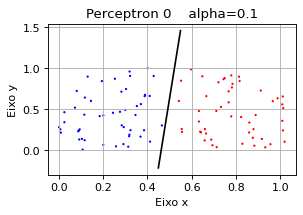

In [ ]:
plot_perceptron_line(perceptron_0, "Perceptron 0    alpha=0.1")

Equação geral da boundary line -> w1 * x + w2 * y + b = 0
Pesos encontrados: w1 = 2.1598817369999996, w2 = -0.12890982500000006, theta = -1.0
Inputs: x, y, -1.0


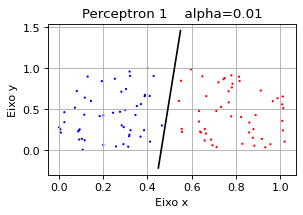

In [ ]:
plot_perceptron_line(perceptron_1, "Perceptron 1    alpha=0.01")

Equação geral da boundary line -> w1 * x + w2 * y + b = 0
Pesos encontrados: w1 = 2.1598817369999996, w2 = -0.12890982500000006, theta = -1.0
Inputs: x, y, -1.0


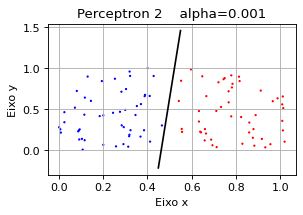

In [ ]:
plot_perceptron_line(perceptron_2, "Perceptron 2    alpha=0.001")

Equação geral da boundary line -> w1 * x + w2 * y + b = 0
Pesos encontrados: w1 = 2.1598817369999996, w2 = -0.12890982500000006, theta = -1.0
Inputs: x, y, -1.0


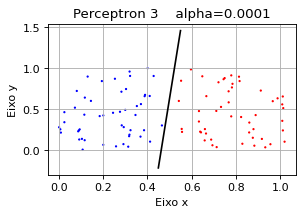

In [ ]:
plot_perceptron_line(perceptron_3, "Perceptron 3    alpha=0.0001")

Equação geral da boundary line -> w1 * x + w2 * y + b = 0
Pesos encontrados: w1 = 2.1598817369999996, w2 = -0.12890982500000006, theta = -1.0
Inputs: x, y, -1.0


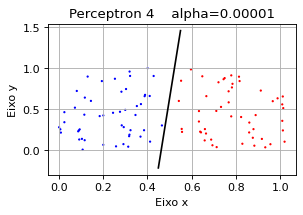

In [ ]:
plot_perceptron_line(perceptron_4, "Perceptron 4    alpha=0.00001")

---

## Questão 3)

### Tratamento da base de dado

Escolhida: Heart Failure Clinical Records Dataset

Link UCI: https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

In [ ]:
from sklearn.model_selection import train_test_split

"""
  Repete a definição de stratify_train_test_validation_split()
  para fazer a questão 3 rodar sem precisar rodar a questão 1
"""

def stratify_train_test_validation_split(X, y, random_state):

  # A base de dados deve ser dividida em 50% para treinamento,
  # 25% para validação e 25% para teste

  # Porcentagens para 2 split:
  treinamento_split = 0.75  # Resulta em 50%
  validacao_split   = 1/3   # Resulta em 25%
  teste_split       = 0.25  # Resulta em 25%

  # A separação dos dados deve ser estratificada

  # Divide em X_train (amostras de treino), X_test (amostras de teste)
  # y_train (classes de treino), y_test (classes de teste)
  X_train, X_test, y_train, y_test = train_test_split(
      X, y,
      stratify = y, # Garante a estratificação das classes
      train_size = treinamento_split,
      test_size  = teste_split,
      random_state = random_state, # Garante embaralhamento
      shuffle = True,
  )

  # Divide em X_train (amostras de treino), X_val (amostras de validação)
  # y_train (classes de treino), y_val (classes de validação)
  X_train, X_val, y_train, y_val = train_test_split(
      X_train, y_train,
      stratify = y_train, # Garante a estratificação das classes
      train_size = 2/3,
      test_size = validacao_split,
      random_state = random_state, # Garante embaralhamento
      shuffle = True,
  )

  return X_train, X_test, X_val, y_train, y_test, y_val

In [ ]:
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
from math import nan

# Download do dataset
heart_failure_dataset = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/00519/heart_failure_clinical_records_dataset.csv'
)
# DEATH_EVENT (target)


# Normaliza as colunas (valores entre 0 e 1)
scaler = MinMaxScaler()
arr_scaled = scaler.fit_transform(heart_failure_dataset)
heart_failure_dataset = pd.DataFrame(
    data    = arr_scaled,
    columns = heart_failure_dataset.columns,
    index   = heart_failure_dataset.index
    )

# Divide em X (amostras) e y (classes)
X = heart_failure_dataset.drop(['DEATH_EVENT'], axis = 1)
y = heart_failure_dataset['DEATH_EVENT']


# Utiliza a função stratify_train_test_validation_split()
# definida no topo da seção Tratamento das bases de dados
(
  hfail_X_train, hfail_X_test, hfail_X_val,
  hfail_y_train, hfail_y_test, hfail_y_val
) = stratify_train_test_validation_split(X, y, 47)


heart_failure_dataset.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0


### Código Reutilizável (Questão 3)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import paired_euclidean_distances
from sklearn.metrics import (silhouette_samples, silhouette_score)

# Retorna um dataframe pra cada cluster
def get_clusters_dataframes(df, number_of_clusters):
  clusters_set = {}

  # Para cada cluster_index preenche o cluster_set com um dataframe desse cluster
  for i in range(number_of_clusters):
    # Cria um dataframe contendo somente as rows desse cluster
    clusters_set[f'cluster_{i}'] = df.query(f'cluster == {i}')

  return clusters_set # Cada dataframe do cluster_set é um cluster


# Calcula a coesão de cada cluster de cada cluster_set
def calculate_cohesion(clusters_set):
  cohesions = []

  # Para cada cluster do cluster_set
  for cluster_index in clusters_set:

    # calcula a coesão desse cluster atual
    cluster = clusters_set[cluster_index] # dataframe do cluster atual
    cluster = cluster.drop(['cluster'], axis = 1)

    cohesion = euclidean_distances(cluster, cluster).sum()

    cohesions.append(cohesion)

  return sum(cohesions)


# Calcula a separação de cada cluster de cada cluster_set
# Cada classificador tem 1 custer_set
def calculate_separation(clusters_set):
  separations = []

  # Para cada par de clusters do cluster_set
  for cluster_a_index in clusters_set:
    partial_separation = []
    for cluster_b_index in clusters_set:

      # calcula a coesão desse cluster atual
      cluster_a = clusters_set[cluster_a_index] # dataframe do cluster 'a' atual
      cluster_b = clusters_set[cluster_b_index] # dataframe do cluster 'b' atual

      cluster_a = cluster_a.drop(['cluster'], axis = 1)
      cluster_b = cluster_b.drop(['cluster'], axis = 1)

      separation = euclidean_distances(cluster_a, cluster_b).sum()
      partial_separation.append(separation)

    separations.append(partial_separation)

  return sum([sum(s) for s in separations])


# Calcula o coeficiente de silhouette
def calculate_silhouette(df):
  silhouette_X = df.drop(['cluster'], axis = 1)
  silhouette_y = df['cluster']

  # silhouette_coeficient = silhouette_samples(silhouette_X, silhouette_y)
  silhouette_coeficient = silhouette_score(silhouette_X, silhouette_y)

  return silhouette_coeficient


### kMeans

In [ ]:
from sklearn.cluster import KMeans


# Gera os classificadores KMeans
kmeans = {
    'kmeans_3': KMeans(n_clusters = 3, random_state = 0),
    'kmeans_6': KMeans(n_clusters = 6, random_state = 0),
    'kmeans_9': KMeans(n_clusters = 9, random_state = 0),
    'kmeans_12': KMeans(n_clusters = 12, random_state = 0),
    'kmeans_15': KMeans(n_clusters = 15, random_state = 0),
    'kmeans_18': KMeans(n_clusters = 18, random_state = 0),
}


# Gera os clusteres
kmeans['kmeans_3' ].fit(X)
kmeans['kmeans_6' ].fit(X)
kmeans['kmeans_9' ].fit(X)
kmeans['kmeans_12'].fit(X)
kmeans['kmeans_15'].fit(X)
kmeans['kmeans_18'].fit(X)



# Coloca uma nova coluna no X contendo a label dos clusters de cada row
clusters_label_3  = kmeans['kmeans_3'].labels_
clusters_label_6  = kmeans['kmeans_6'].labels_
clusters_label_9  = kmeans['kmeans_9'].labels_
clusters_label_12 = kmeans['kmeans_12'].labels_
clusters_label_15 = kmeans['kmeans_15'].labels_
clusters_label_18 = kmeans['kmeans_18'].labels_

X_3  = X.copy()
X_6  = X.copy()
X_9  = X.copy()
X_12 = X.copy()
X_15 = X.copy()
X_18 = X.copy()

X_3['cluster']  = clusters_label_3.tolist()
X_6['cluster']  = clusters_label_6.tolist()
X_9['cluster']  = clusters_label_9.tolist()
X_12['cluster'] = clusters_label_12.tolist()
X_15['cluster'] = clusters_label_15.tolist()
X_18['cluster'] = clusters_label_18.tolist()


# Cada classificador tem 1 cluster_set contendo k dataframes
clusters_set_3  = get_clusters_dataframes(X_3,   3) #  3 clusters nesse cluster_set
clusters_set_6  = get_clusters_dataframes(X_6,   6) #  6 clusters nesse cluster_set
clusters_set_9  = get_clusters_dataframes(X_9,   9) #  9 clusters nesse cluster_set
clusters_set_12 = get_clusters_dataframes(X_12, 12) # 12 clusters nesse cluster_set
clusters_set_15 = get_clusters_dataframes(X_15, 15) # 15 clusters nesse cluster_set
clusters_set_18 = get_clusters_dataframes(X_18, 18) # 18 clusters nesse cluster_set

# print(clusters_set_3) # printa 3 dataframes, cada 1 com a coluna cluster constante
# print(clusters_set_6) # printa 6 dataframes, cada 1 com a coluna cluster constante


# Calcula e print() coesão
cohesion_3  = calculate_cohesion(clusters_set_3 )
cohesion_6  = calculate_cohesion(clusters_set_6 )
cohesion_9  = calculate_cohesion(clusters_set_9 )
cohesion_12 = calculate_cohesion(clusters_set_12)
cohesion_15 = calculate_cohesion(clusters_set_15)
cohesion_18 = calculate_cohesion(clusters_set_18)


print( f"Coesão para k =  3:   { cohesion_3:.2f}" )
print( f"Coesão para k =  6:   { cohesion_6:.2f}" )
print( f"Coesão para k =  9:   { cohesion_9:.2f}" )
print( f"Coesão para k = 12:   {cohesion_12:.2f}" )
print( f"Coesão para k = 15:   {cohesion_15:.2f}" )
print( f"Coesão para k = 18:   {cohesion_18:.2f}" )
print("=----------=")


# Calcula e print() separação
separations_3  = calculate_separation(clusters_set_3 )
separations_6  = calculate_separation(clusters_set_6 )
separations_9  = calculate_separation(clusters_set_9 )
separations_12 = calculate_separation(clusters_set_12)
separations_15 = calculate_separation(clusters_set_15)
separations_18 = calculate_separation(clusters_set_18)

print( f"Separação para k =  3:   { separations_3:.2f}" )
print( f"Separação para k =  6:   { separations_6:.2f}" )
print( f"Separação para k =  9:   { separations_9:.2f}" )
print( f"Separação para k = 12:   {separations_12:.2f}" )
print( f"Separação para k = 15:   {separations_15:.2f}" )
print( f"Separação para k = 18:   {separations_18:.2f}" )
print("=----------=")


# Calcula e print() coeficiente de silhouette
sc_3  = calculate_silhouette(X_3)
sc_6  = calculate_silhouette(X_6)
sc_9  = calculate_silhouette(X_9)
sc_12 = calculate_silhouette(X_12)
sc_15 = calculate_silhouette(X_15)
sc_18 = calculate_silhouette(X_18)

print( f"Coeficiente silhouette para k =  3:   { sc_3:.4f}" )
print( f"Coeficiente silhouette para k =  6:   { sc_6:.4f}" )
print( f"Coeficiente silhouette para k =  9:   { sc_9:.4f}" )
print( f"Coeficiente silhouette para k = 12:   {sc_12:.4f}" )
print( f"Coeficiente silhouette para k = 15:   {sc_15:.4f}" )
print( f"Coeficiente silhouette para k = 18:   {sc_18:.4f}" )
print("=----------=")


Coesão para k =  3:   40610.53
Coesão para k =  6:   16952.94
Coesão para k =  9:   10205.83
Coesão para k = 12:   7013.14
Coesão para k = 15:   4680.00
Coesão para k = 18:   3709.14
=----------=
Separação para k =  3:   143853.78
Separação para k =  6:   143853.78
Separação para k =  9:   143853.78
Separação para k = 12:   143853.78
Separação para k = 15:   143853.78
Separação para k = 18:   143853.78
=----------=
Coeficiente silhouette para k =  3:   0.1858
Coeficiente silhouette para k =  6:   0.2186
Coeficiente silhouette para k =  9:   0.2703
Coeficiente silhouette para k = 12:   0.3012
Coeficiente silhouette para k = 15:   0.3518
Coeficiente silhouette para k = 18:   0.3977
=----------=


### DBScan

In [ ]:
from sklearn.cluster import DBSCAN

# Gera os classificadores DBSCAN
dbscans = {
    'dbscans_50_3': DBSCAN(eps = 0.50  , min_samples = 3),
    'dbscans_50_6': DBSCAN(eps = 0.50  , min_samples = 6),

    'dbscans_55_3': DBSCAN(eps = 0.55  , min_samples = 3),
    'dbscans_55_6': DBSCAN(eps = 0.55  , min_samples = 6),

    'dbscans_60_3': DBSCAN(eps = 0.60  , min_samples = 3),
    'dbscans_60_6': DBSCAN(eps = 0.60  , min_samples = 6),
}


# Gera os clusteres
dbscans['dbscans_50_3'].fit(X)
dbscans['dbscans_50_6'].fit(X)
dbscans['dbscans_55_3'].fit(X)
dbscans['dbscans_55_6'].fit(X)
dbscans['dbscans_60_3'].fit(X)
dbscans['dbscans_60_6'].fit(X)


# Coloca uma nova coluna no X contendo a label dos clusters de cada row
clusters_label_50_3 = dbscans['dbscans_50_3'].labels_
clusters_label_50_6 = dbscans['dbscans_50_6'].labels_
clusters_label_55_3 = dbscans['dbscans_55_3'].labels_
clusters_label_55_6 = dbscans['dbscans_55_6'].labels_
clusters_label_60_3 = dbscans['dbscans_60_3'].labels_
clusters_label_60_6 = dbscans['dbscans_60_6'].labels_

X_50_3 = X.copy()
X_50_6 = X.copy()
X_55_3 = X.copy()
X_55_6 = X.copy()
X_60_3 = X.copy()
X_60_6 = X.copy()

X_50_3['cluster'] = clusters_label_50_3.tolist()
X_50_6['cluster'] = clusters_label_50_6.tolist()
X_55_3['cluster'] = clusters_label_55_3.tolist()
X_55_6['cluster'] = clusters_label_55_6.tolist()
X_60_3['cluster'] = clusters_label_60_3.tolist()
X_60_6['cluster'] = clusters_label_60_6.tolist()

# Cada classificador tem 1 cluster_set com clusters_label.max() +1 dataframes
# OBS: Os pontos de ruído são eliminados nessa função
clusters_set_50_3 = get_clusters_dataframes(X_50_3, clusters_label_50_3.max() +1 )
clusters_set_50_6 = get_clusters_dataframes(X_50_6, clusters_label_50_6.max() +1 )
clusters_set_55_3 = get_clusters_dataframes(X_55_3, clusters_label_55_3.max() +1 )
clusters_set_55_6 = get_clusters_dataframes(X_55_6, clusters_label_55_6.max() +1 )
clusters_set_60_3 = get_clusters_dataframes(X_60_3, clusters_label_60_3.max() +1 )
clusters_set_60_6 = get_clusters_dataframes(X_60_6, clusters_label_60_6.max() +1 )

# Calcula e print() coesão
cohesion_50_3 = calculate_cohesion(clusters_set_50_3)
cohesion_50_6 = calculate_cohesion(clusters_set_50_6)
cohesion_55_3 = calculate_cohesion(clusters_set_55_3)
cohesion_55_6 = calculate_cohesion(clusters_set_55_6)
cohesion_60_3 = calculate_cohesion(clusters_set_60_3)
cohesion_60_6 = calculate_cohesion(clusters_set_60_6)


print( f"Coesão para  eps = 0.50  e  min_samples = 3:   {cohesion_50_3:.2f}" )
print( f"Coesão para  eps = 0.50  e  min_samples = 6:   {cohesion_50_6:.2f}" )
print( f"Coesão para  eps = 0.55  e  min_samples = 3:   {cohesion_55_3:.2f}" )
print( f"Coesão para  eps = 0.55  e  min_samples = 6:   {cohesion_60_3:.2f}" )
print( f"Coesão para  eps = 0.60  e  min_samples = 3:   {cohesion_60_3:.2f}" )
print( f"Coesão para  eps = 0.60  e  min_samples = 6:   {cohesion_60_6:.2f}" )
print("=----------=")

# Calcula e print() separação
separations_50_3 = calculate_separation(clusters_set_50_3)
separations_50_6 = calculate_separation(clusters_set_50_6)
separations_55_3 = calculate_separation(clusters_set_55_3)
separations_60_3 = calculate_separation(clusters_set_55_6)
separations_60_3 = calculate_separation(clusters_set_60_3)
separations_60_6 = calculate_separation(clusters_set_60_6)

print( f"Separação para  eps = 0.50  e  min_samples = 3:   {separations_50_3:6.2f}" )
print( f"Separação para  eps = 0.50  e  min_samples = 6:   0{separations_50_6:6.2f}" )
print( f"Separação para  eps = 0.55  e  min_samples = 3:   {separations_55_3:6.2f}" )
print( f"Separação para  eps = 0.55  e  min_samples = 6:   {separations_60_3:6.2f}" )
print( f"Separação para  eps = 0.60  e  min_samples = 3:   {separations_60_3:6.2f}" )
print( f"Separação para  eps = 0.60  e  min_samples = 6:   {separations_60_6:6.2f}" )
print("=----------=")

# Calcula e print() coeficiente de silhouette
sc_50_3 = calculate_silhouette(X_50_3)
sc_50_6 = calculate_silhouette(X_50_6)
sc_55_3 = calculate_silhouette(X_55_3)
sc_55_6 = calculate_silhouette(X_55_6)
sc_60_3 = calculate_silhouette(X_60_3)
sc_60_6 = calculate_silhouette(X_60_6)

print( f"Coeficiente silhouette para  eps = 0.50  e  min_samples = 3:   {sc_50_3:.4f}" )
print( f"Coeficiente silhouette para  eps = 0.50  e  min_samples = 6:   {sc_50_6:.4f}" )
print( f"Coeficiente silhouette para  eps = 0.55  e  min_samples = 3:   {sc_55_3:.4f}" )
print( f"Coeficiente silhouette para  eps = 0.55  e  min_samples = 6:   {sc_55_6:.4f}" )
print( f"Coeficiente silhouette para  eps = 0.60  e  min_samples = 3:   {sc_60_3:.4f}" )
print( f"Coeficiente silhouette para  eps = 0.60  e  min_samples = 6:   {sc_60_6:.4f}" )
print("=----------=")

Coesão para  eps = 0.50  e  min_samples = 3:   2067.88
Coesão para  eps = 0.50  e  min_samples = 6:   1742.49
Coesão para  eps = 0.55  e  min_samples = 3:   2253.69
Coesão para  eps = 0.55  e  min_samples = 6:   2295.30
Coesão para  eps = 0.60  e  min_samples = 3:   2295.30
Coesão para  eps = 0.60  e  min_samples = 6:   2250.49
=----------=
Separação para  eps = 0.50  e  min_samples = 3:   114217.22
Separação para  eps = 0.50  e  min_samples = 6:   088307.27
Separação para  eps = 0.55  e  min_samples = 3:   123416.70
Separação para  eps = 0.55  e  min_samples = 6:   125321.06
Separação para  eps = 0.60  e  min_samples = 3:   125321.06
Separação para  eps = 0.60  e  min_samples = 6:   116130.28
=----------=
Coeficiente silhouette para  eps = 0.50  e  min_samples = 3:   0.4109
Coeficiente silhouette para  eps = 0.50  e  min_samples = 6:   0.3223
Coeficiente silhouette para  eps = 0.55  e  min_samples = 3:   0.4374
Coeficiente silhouette para  eps = 0.55  e  min_samples = 6:   0.4087
Coef

### Tendência de agrupamento de Hopkins

In [ ]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform

import numpy as np
from math import isnan


# Link com tutorial explicando esse código:
# https://sushildeore99.medium.com/really-what-is-hopkins-statistic-bad1265df4b

def grouping_tendency(X):

  d = X.shape[1] # Número de colunas -> 12
  n = len(X)     # Número de linhas  -> 299
  m = int(0.1 * n) # 29 = m << n  é a quantidade de elementos das 2 amostras

  nn = NearestNeighbors( n_neighbors = 1 )
  nn.fit(X.values)

  index_to_filter = range(0, n) # lista com n elementos de 0 até n
  rand_X = sample( index_to_filter, m ) # Retorna m valores aleatórios sem repetição

  # Congela o valor de rand_X para garantir que o valor H não mude muito
  # OBS: essa lista foi gerada aleatoriamente
  rand_X = [136, 179, 154, 94, 206, 214, 137, 44, 76, 239, 170, 190, 48, 138, 47, 120, 25, 251, 245, 216, 127, 293, 52, 168, 270, 280, 196, 265, 34]

  distances_u_i = [] # Armazena as distâncias da amostra artificial uniforme
  distances_w_i = [] # Armazena as distâncias do subconjunto de X sem repetição de linha
  for j in range(0, m):

    min = np.amin(X, axis=0) # Um vetor contendo o min valor de cada coluna
    max = np.amax(X, axis=0) # Um vetor contendo o max valor de cada coluna
    amostras_artificiais_uniformes = uniform(min, max, d).reshape(1, -1)
    u_dist, _ = nn.kneighbors(amostras_artificiais_uniformes, 2, return_distance=True)
    distances_u_i.append(u_dist[0][1])


    filtered_X = X.iloc[rand_X[j]].values.reshape(1, -1)
    w_dist, _ = nn.kneighbors(filtered_X, 2, return_distance=True)
    distances_w_i.append(w_dist[0][1])


  H = sum(distances_u_i) / (sum(distances_u_i) + sum(distances_w_i))

  # Checa se o resultado é NaN
  if isnan(H):
     print(distances_u_i, distances_w_i)
     H = 0

  return H


# Cálcula a tendência de agrupamento da base de dados X = heart_failure_dataset
H = grouping_tendency(X)
print(f"A tendência de agrupamento da base de dados X = heart_failure_dataset é {H:.2f}")

A tendência de agrupamento da base de dados X = heart_failure_dataset é 0.79
